In [241]:
#ISupport Vector Machine 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error 

from sklearn.metrics import r2_score

#from sklearn.model_selection import train_test_split


from sklearn.svm import SVR
from sklearn.metrics import confusion_matrix

from sklearn.preprocessing import StandardScaler

import plotly.express as px

In [242]:
from sklearn.model_selection import train_test_split

In [243]:
dataset=pd.read_csv('breast-cancer.csv')
dataset

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [244]:
fig= px.histogram(dataset, x='diagnosis',color='diagnosis', barmode='group', title='Malignant vs Benign')
fig.show()

In [245]:
fig = px.pie(dataset, values='radius_mean', names='diagnosis', title='Relation')
fig.show()

In [246]:
fig = px.pie(dataset, values='fractal_dimension_se', names='diagnosis', title='Relation')
fig.show()

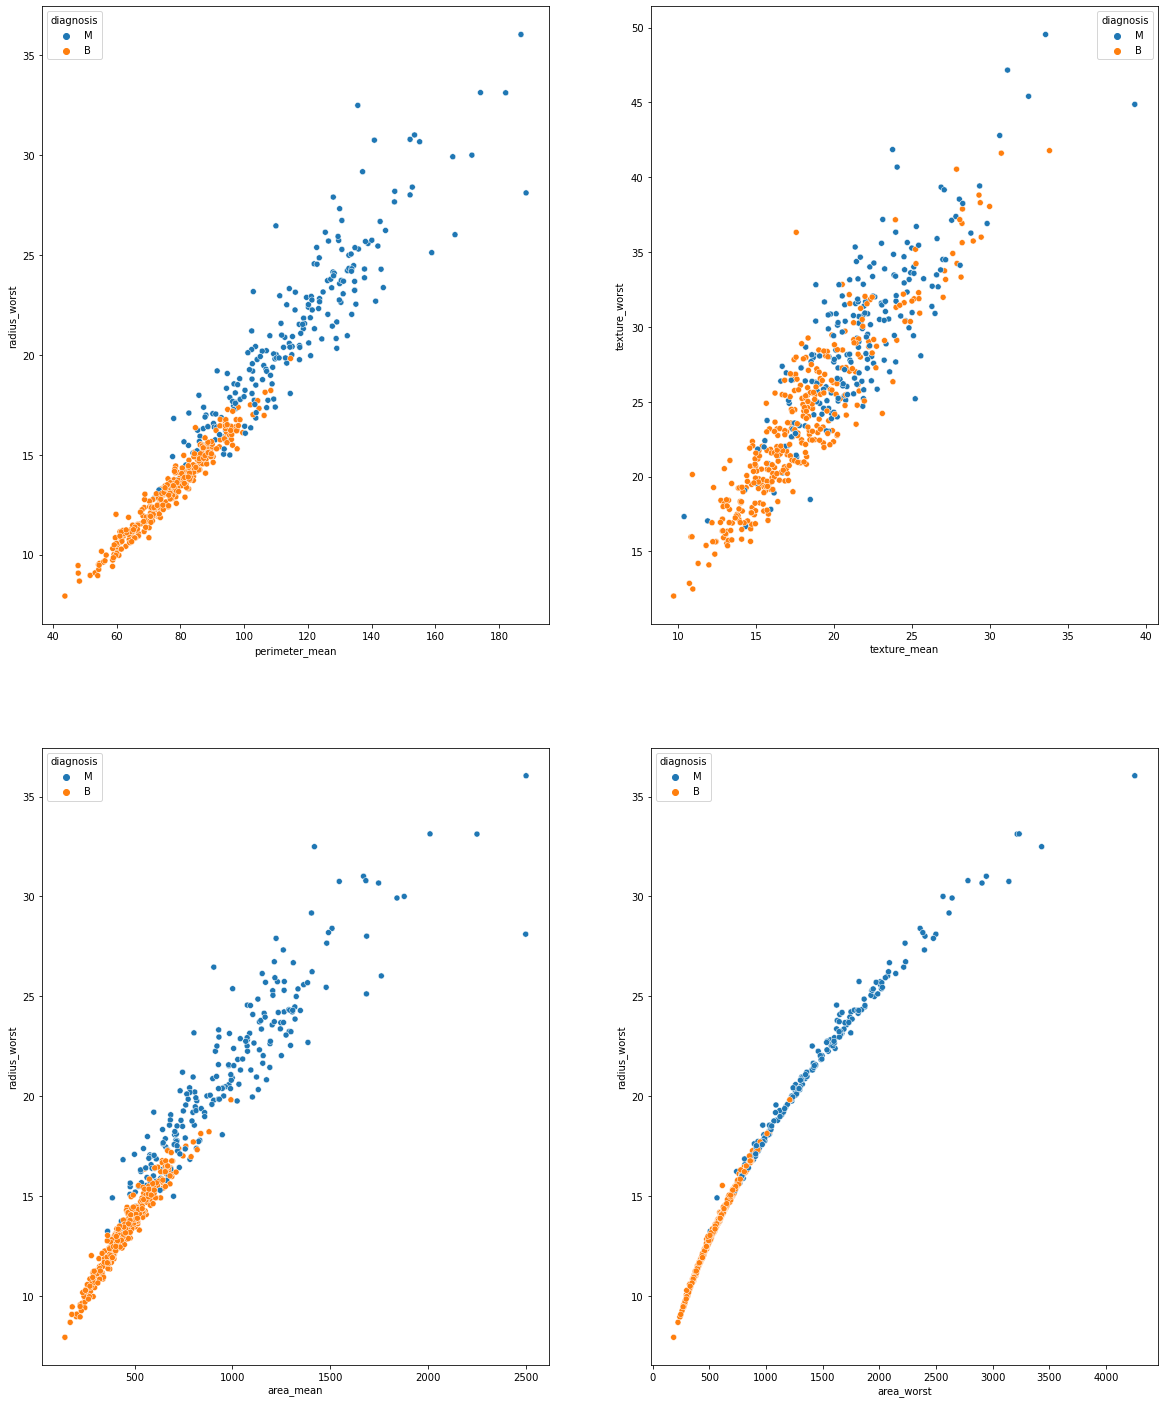

In [247]:

#postive correlation
df=dataset
fig,ax=plt.subplots(2,2,figsize=(20,25))
sns.scatterplot(x='perimeter_mean',y='radius_worst',data=df,hue='diagnosis',ax=ax[0][0])
sns.scatterplot(x='area_mean',y='radius_worst',data=df,hue='diagnosis',ax=ax[1][0])
sns.scatterplot(x='texture_mean',y='texture_worst',data=df,hue='diagnosis',ax=ax[0][1])
sns.scatterplot(x='area_worst',y='radius_worst',data=df,hue='diagnosis',ax=ax[1][1])
plt.show()

<AxesSubplot:xlabel='area_mean', ylabel='smoothness_se'>

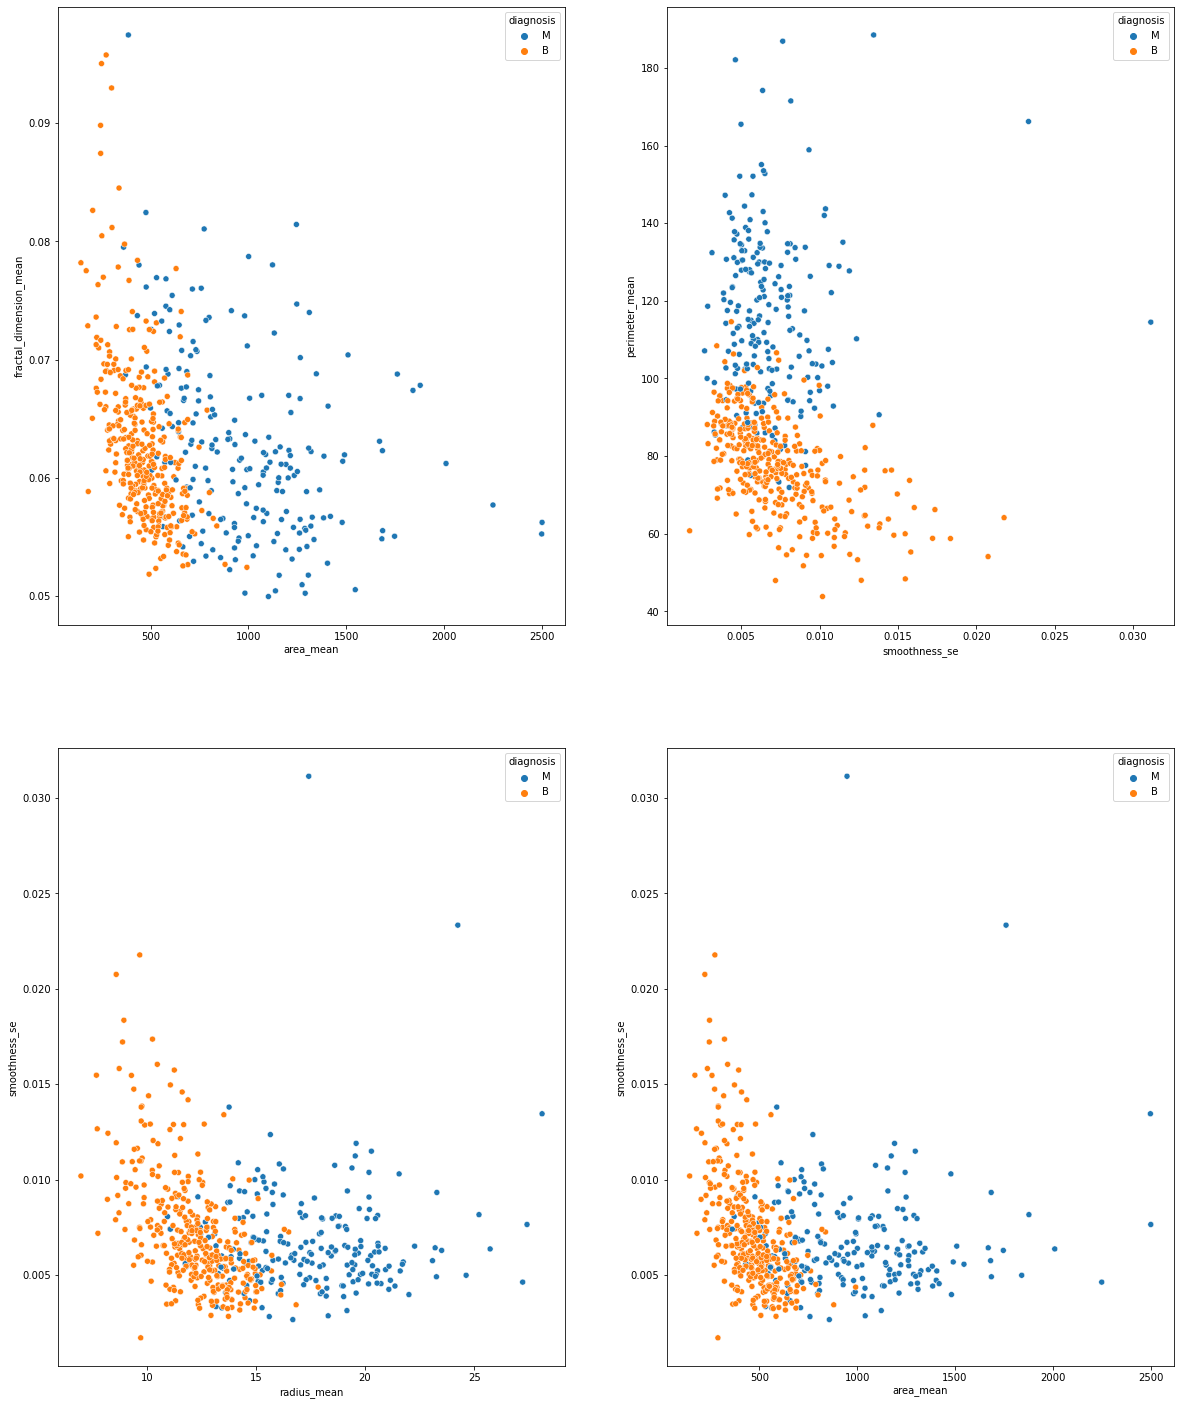

In [248]:
#negative correlation
fig,ax=plt.subplots(2,2,figsize=(20,25))
sns.scatterplot(x='area_mean',y='fractal_dimension_mean',data=df,hue='diagnosis',ax=ax[0][0])
sns.scatterplot(x='radius_mean',y='smoothness_se',data=df,hue='diagnosis',ax=ax[1][0])
sns.scatterplot(x='smoothness_se',y='perimeter_mean',data=df,hue='diagnosis',ax=ax[0][1])
sns.scatterplot(x='area_mean',y='smoothness_se',data=df,hue='diagnosis',ax=ax[1][1])


In [249]:
fig = px.scatter(df,x='radius_mean',y='perimeter_mean',color='diagnosis',size_max=60)
fig.show()

In [250]:
fig = px.scatter(df,x='concavity_worst',y='perimeter_mean',color='diagnosis',size_max=60)
fig.show()

In [251]:
fig2=px.scatter(df,x='texture_worst',y= 'symmetry_worst',color='diagnosis',size_max=60)
fig2.show()

In [252]:
import plotly.figure_factory as ff


hist_data = [df['radius_mean']]
group_labels = ['distplot'] # name of the dataset

fig = ff.create_distplot(hist_data, group_labels)
fig.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, 'radius_mean'),
  Text(1, 0, 'texture_mean'),
  Text(2, 0, 'perimeter_mean'),
  Text(3, 0, 'area_mean'),
  Text(4, 0, 'smoothness_mean'),
  Text(5, 0, 'compactness_mean'),
  Text(6, 0, 'concavity_mean'),
  Text(7, 0, 'concave points_mean'),
  Text(8, 0, 'symmetry_mean'),
  Text(9, 0, 'fractal_dimension_mean'),
  Text(10, 0, 'radius_se'),
  Text(11, 0, 'texture_se'),
  Text(12, 0, 'perimeter_se')])

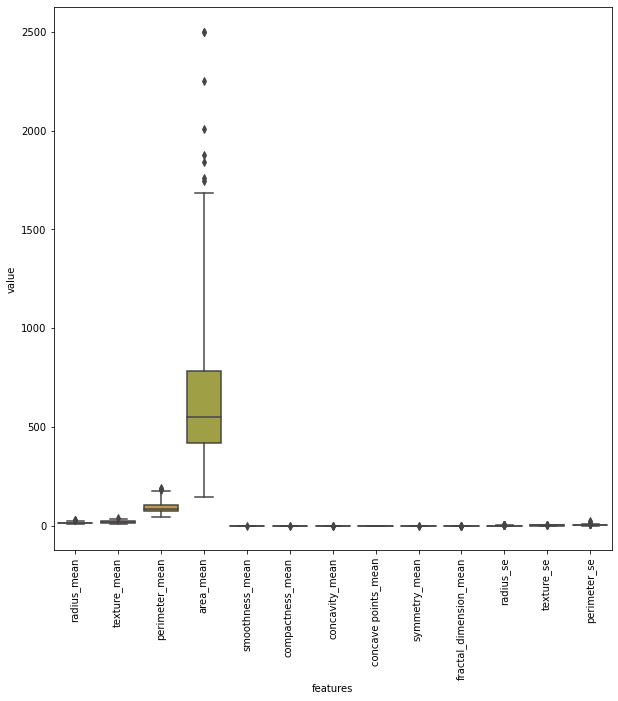

In [253]:
data = pd.concat([df.diagnosis,df.iloc[:,2:15]],axis=1)
data = pd.melt(data,id_vars="diagnosis",var_name="features",value_name='value')
plt.figure(figsize=(10,10))
sns.boxplot(x="features", y="value",whis=2.5, data=data)
plt.xticks(rotation=90)

In [254]:
from scipy.stats import pearsonr

In [255]:
cols_mean=list(df.columns)[2:20]
cols_worst=list(df.columns)[22:32]
for i in range(0,10):
    corr, _ = pearsonr(df[cols_mean[i]],df[cols_worst[i]])
    print(cols_mean[i],'-',cols_worst[i],'=',corr)

radius_mean - radius_worst = 0.9695389726112061
texture_mean - texture_worst = 0.9120445888404216
perimeter_mean - perimeter_worst = 0.97038688704264
area_mean - area_worst = 0.9592133256499005
smoothness_mean - smoothness_worst = 0.805324195494363
compactness_mean - compactness_worst = 0.865809039802263
concavity_mean - concavity_worst = 0.8841026390943827
concave points_mean - concave points_worst = 0.9101553142985933
symmetry_mean - symmetry_worst = 0.6998257976437309
fractal_dimension_mean - fractal_dimension_worst = 0.7672967792384363


<AxesSubplot:>

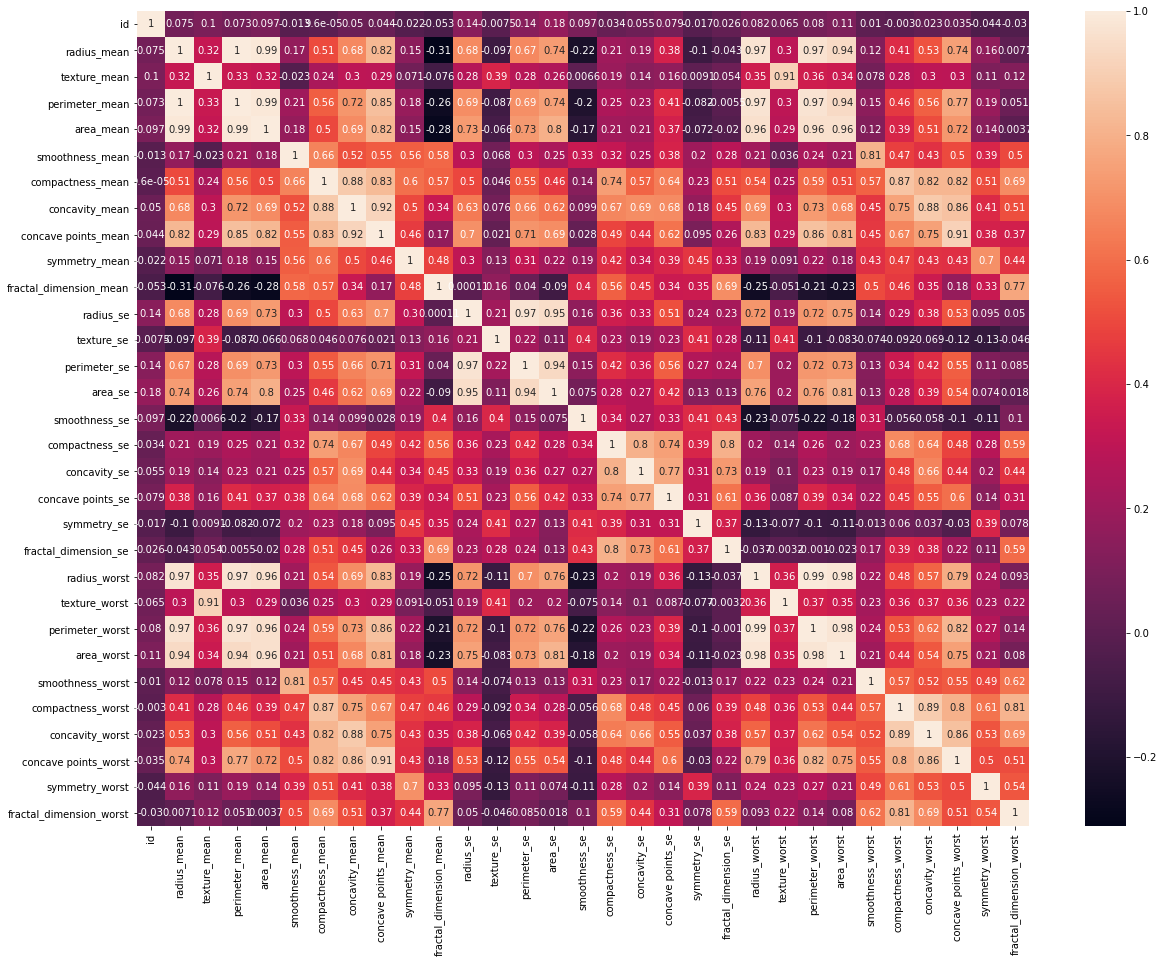

In [256]:
fig, ax = plt.subplots(figsize=(20,15)) 
sns.heatmap(df.corr(),ax=ax,annot=True)

As we can see in heatmap compactness_mean, concavity_mean and concave_points_mean are correlated with each other so we remove compactness_mean and concave_points_mean also area_mean, perimeter_mean and radius_mean are correlated with each other so we keep only area_mean .Similarly we remove compactness_se,concave points_se and keep concavity_se , remove radius_std_dev, perimeter_std_dev and keep only area_std_dev , remove compactness_worst, concave_points__worst and keep only concavity_worst , remove radius_worst , perimeter_worst and keep only area_worst.

In [257]:
dataset['diagnosis'] = dataset['diagnosis'].map({'M': 0, 'B': 1}).astype(float)

In [258]:
#let's drop the diagnosis and id to define data feature 
X=dataset.drop(['diagnosis', 'id'], axis=1)
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [259]:
dataset

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,0.0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,0.0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,0.0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,0.0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,0.0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,0.0,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,0.0,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,0.0,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,0.0,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [260]:
y=dataset['diagnosis']
y.tail()

564    0.0
565    0.0
566    0.0
567    0.0
568    1.0
Name: diagnosis, dtype: float64

In [261]:
#let's drop the diagnosis and id to define data feature 
X=dataset.drop(['diagnosis', 'id'], axis=1)
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [262]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [263]:
# we need to standardize our features dataset (if not scaled, the data points are too sparse or scattered to be separated )
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [264]:
X_test

array([[-0.20175604,  0.3290786 , -0.13086754, ...,  1.3893291 ,
         1.08203284,  1.54029664],
       [-0.25555773,  1.46763319, -0.31780437, ..., -0.83369364,
        -0.73131577, -0.87732522],
       [-0.02619262, -0.8407682 , -0.09175081, ..., -0.49483785,
        -1.22080864, -0.92115937],
       ...,
       [ 1.71811488,  0.09318356,  1.7286186 , ...,  1.57630515,
         0.20317063, -0.15406178],
       [ 1.18859296,  0.34352115,  1.19333694, ...,  0.56019755,
         0.26991966, -0.27320074],
       [ 0.26263752, -0.58080224,  0.28459338, ..., -0.19383705,
        -1.15564888,  0.11231497]])

In [265]:
y_test

512    0.0
457    1.0
439    1.0
298    1.0
37     1.0
      ... 
213    0.0
519    1.0
432    0.0
516    0.0
500    1.0
Name: diagnosis, Length: 114, dtype: float64

In [266]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=1)
#N_components refers to the number of linear discriminates that we want to retrieve

In [267]:
#fit features data to the module 
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [268]:
#to further classify, let's use random forest classifier 

In [269]:
from sklearn.ensemble import RandomForestClassifier

In [270]:
RFC = RandomForestClassifier(max_depth=5, random_state=34)
RFC.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=34)

In [271]:
y_pred=RFC.predict(X_test)

In [272]:
r2_score(y_test,y_pred)

0.8189901556049539

In [273]:
# lda.score(X_test, y_test)

In [274]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)

accuracy_score(y_test, y_pred)

0.956140350877193

<AxesSubplot:>

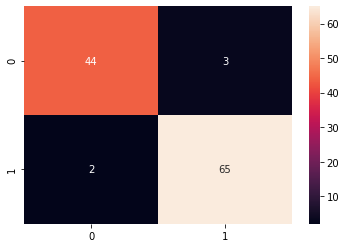

In [275]:
sns.heatmap(cm, annot=True)